<a href="https://colab.research.google.com/github/yilewang/TVB_Demo/blob/master/sim2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install tvb-library
%pylab inline
import os
from tvb.simulator.lab import *
LOG = get_logger('demo')
import pickle as cPickle
from tvb.simulator.models.stefanescu_jirsa import ReducedSetHindmarshRose


In [2]:
%%capture
! wget -c -O 0306A.zip --no-check-certificate https://github.com/yilewang/TVB_Demo/raw/master/0306A.zip
path = os.path.abspath("0306A.zip")
print(path)

In [3]:
speed=10.
oscillator = models.ReducedSetHindmarshRose()
white_matter = connectivity.Connectivity.from_file(path)
# oscilator.variables_of_interest = ["xi"]
white_matter.speed = np.array([speed])
white_matter_coupling = coupling.Linear(a=np.array([0.015]))
heunint = integrators.HeunStochastic(dt=0.01220703125, noise=noise.Additive(nsig=np.array([0.00001]), ntau=0.0, random_stream=np.random.RandomState(seed=42)))
# Initialise some Monitors with period in physical time
mon_raw = monitors.Raw()
mon_tavg = monitors.TemporalAverage(period=1.)
what_to_watch = (mon_tavg, mon_raw)
# Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model=oscillator, connectivity=white_matter,
                        coupling=white_matter_coupling,
                        integrator=heunint, monitors=what_to_watch, simulation_length=1e3)
sim.configure()

,value
Type,Simulator
conduction_speed,3.0
connectivity,Connectivity gid: 94096102-9b89-435e-bb25-9acdc36c50fe
coupling,Linear gid: c4d13f09-d036-43d6-bb96-834616a25b5f
gid,UUID('ce807c5a-79ec-4fc7-badf-e075a52b990d')
initial_conditions,None
integrator,HeunStochastic gid: 40c2e265-5487-4f19-98fe-341b45aca504
model,ReducedSetHindmarshRose gid: 2afe70c6-d86e-4a8d-a7a8-22c719ebde5b
monitors,"(, )"
simulation_length,1000.0


In [4]:
(tavg_time, tavg_data), (raw_time, raw_data) = sim.run()

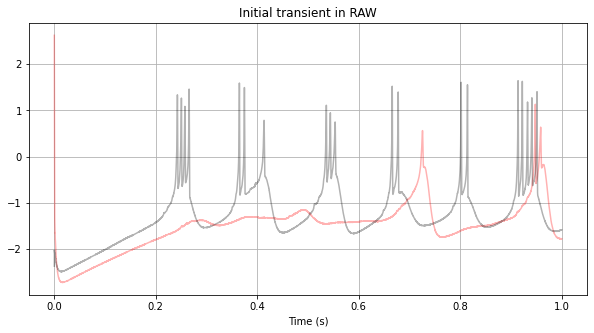

In [5]:
figure(figsize=(10, 5))
plt.plot(raw_time * 1e-3, raw_data[:, 0, 4, 0], "r", alpha=0.3)
plt.plot(raw_time * 1e-3, raw_data[:, 0, 5, 0], "k", alpha=0.3)
plt.title('Initial transient in RAW')
plt.xlabel('Time (s)')
plt.grid(True)
plt.show()